In [24]:
import pandas as pd
import numpy as np
import cv2
import av
import torchvision
%matplotlib inline
from matplotlib import pyplot as plt
import IPython
import torch
import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = "tight"

def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [2]:
frame_list = pd.read_csv('anno_train.csv', header=None)

n = 3
video_name = frame_list.iloc[n, 0]
frame_num = frame_list.iloc[n, 1]
frame_label = frame_list.iloc[n, 2]

print('Video name: {}'.format(video_name))
print('Frame number: {}'.format(frame_num))
print('Frame label: {}'.format(frame_label))

Video name: L334aqEJxys01.mp4
Frame number: 145
Frame label: 1


/notebooks/data/Datasets/CPTAD/Videos/L334aqEJxys01.mp4
torch.Size([7, 3, 720, 1280])


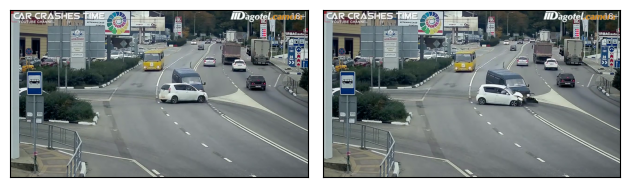

In [47]:
filename = '/notebooks/data/Datasets/CPTAD/Videos/' + video_name
print(filename)
nframes = 10

# torchvision loader
frames,_,_ = torchvision.io.read_video(filename,start_pts=144/30,end_pts=150/30,pts_unit='sec',output_format="TCHW")
print(frames.size())
im_batch = torch.stack([frames[0], frames[6]])
 
plot(im_batch)

# _,ret = cv2.imencode('.jpg', frames[0])
# i = IPython.display.Image(data=ret)
# IPython.display.display(i)

# opencv loader
# frames = []
# cap = cv2.VideoCapture(filename)
# #cap.set(2, frame_num - nframes) # CAP_PROP_POS_FRAMES
# ret = True
# i = 0
# while ret and i < nframes:
#     ret, img = cap.read()
#     if ret:
#         frames.append(img)
#         i += 1
# clip = np.stack(frames, axis=0)

#todo: show clip
